## Bell Pepper Infectious/Healthy Prediction using CNN
By Sanjay R

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
epochs = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\SANJAY\\Desktop\\MTECH\\Machine Learning\\Self-Projects\\archive (2)\\PlantVillage',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [6]:
len(dataset)

78

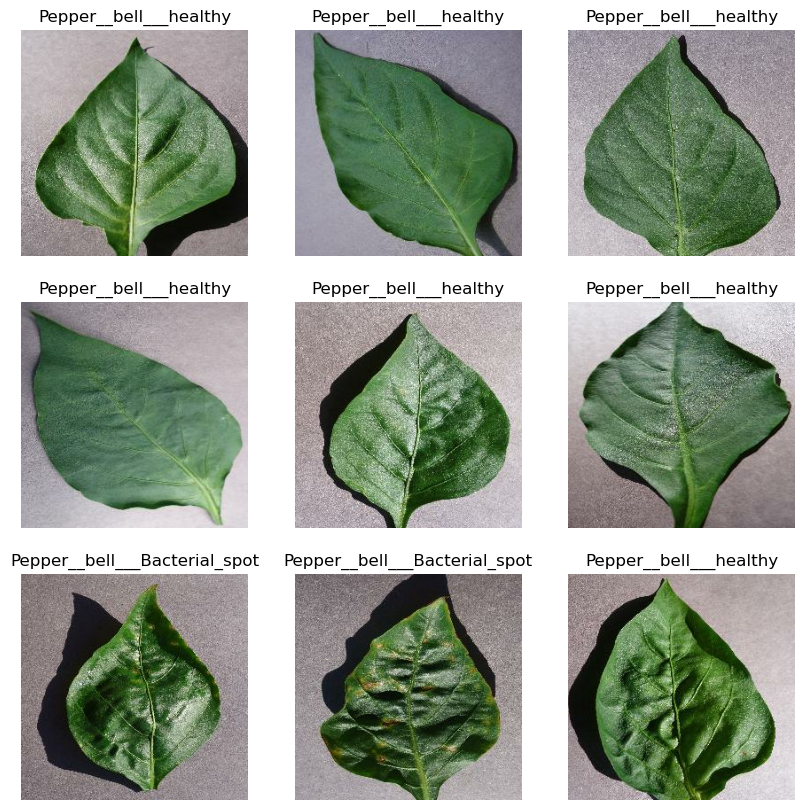

In [7]:
#Exploring the dataset
plt.figure(figsize = (10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        #print(images.shape)
        #print(labels.numpy())
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [8]:
#Splitting the data into train, validation(at the end of each epoch) and test data
def dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1):
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    
    val_size = int(val_split * ds_size) 
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds =  ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = dataset_partition(dataset)
len(test_ds)

9

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [13]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = models.Sequential([resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')])
model.build(input_shape=input_shape)

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy',  # Metric to monitor
                               patience=5,              # Number of epochs to wait after reaching the target before stopping
                               min_delta=0.001,         # Minimum change to qualify as an improvement
                               mode='max',              # Mode 'max' for accuracy
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity


history = model.fit(train_ds, epochs=epochs, batch_size=BATCH_SIZE, verbose=1, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1121s 15s/step - accuracy: 0.5767 - loss: 0.6923 - val_accuracy: 0.5625 - val_loss: 0.7265
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 797s 13s/step - accuracy: 0.7015 - loss: 0.6240 - val_accuracy: 0.9509 - val_loss: 0.1491
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 882s 14s/step - accuracy: 0.8984 - loss: 0.3357 - val_accuracy: 0.9509 - val_loss: 0.1832
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 738s 12s/step - accuracy: 0.9474 - loss: 0.1830 - val_accuracy: 0.9777 - val_loss: 0.0823
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 669s 11s/step - accuracy: 0.9594 - loss: 0.1851 - val_accuracy: 0.9911 - val_loss: 0.0386
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 776s 13s/step - accuracy: 0.9774 - loss: 0.0616 - val_accuracy: 0.9911 - val_loss: 0.0273
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 809s 13s/step - accuracy: 0.9924 - loss: 0.0482 - val_accuracy: 0.9777 - val_loss: 0.0451
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 818s 13s/step - accuracy: 0.9943 - loss: 0.0549 - val_accuracy: 0

In [17]:
scores = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9921 - loss: 0.0158


First image to predict
actual label: Pepper__bell___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
predicted label: Pepper__bell___Bacterial_spot


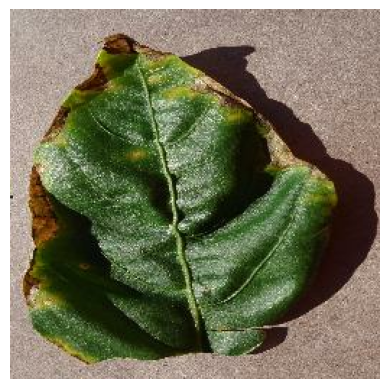

In [18]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    plt.axis('off')
    print('actual label:', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


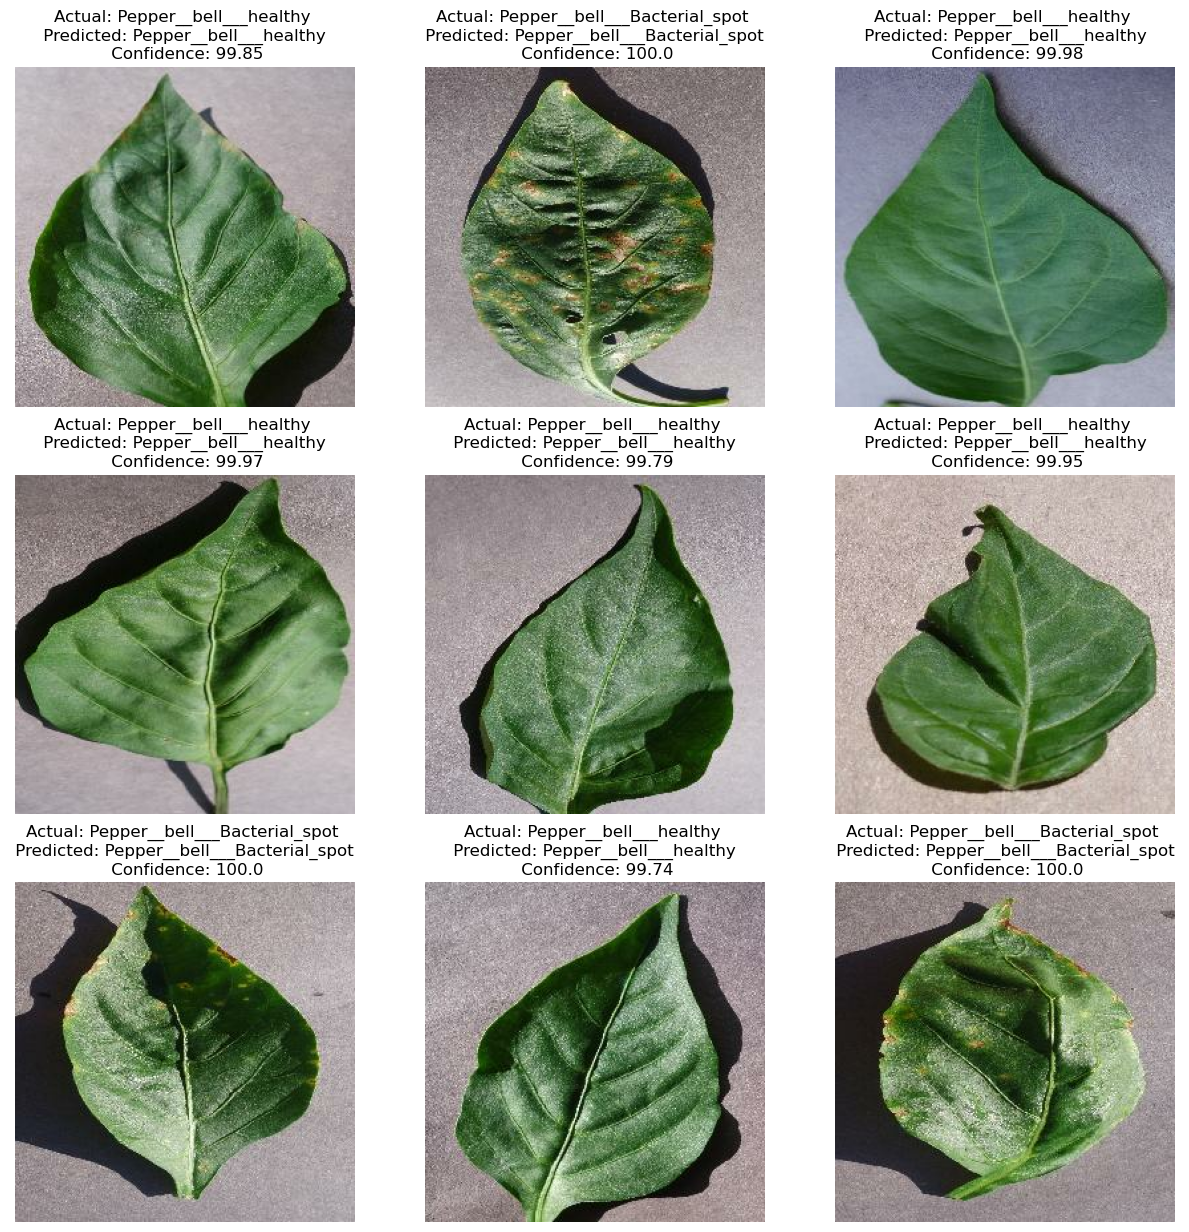

In [20]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}')